# Importing Header and SoilPrep

In [1]:
import import_ipynb 
from Header import *

import import_ipynb
from SoilPrep import *

importing Jupyter notebook from Header.ipynb
importing Jupyter notebook from SoilPrep.ipynb


## Loading Data, MetaData, and Mtree 

In [2]:
with open ('meta_data.pickle', 'rb') as file:
    MetaData = pickle.load(file)

sg_filters = MetaData['sg_filters']
window_lengths = MetaData['window_lengths']
prepare_spec = MetaData['prepare_spec']
nbands_sampling = MetaData['nbands_sampling']
target_names = MetaData['target_names']
prepare_target = MetaData['prepare_target']
ml_methods = MetaData['ml_methods']


with open ('data.pickle', 'rb') as file:
    Data = pickle.load(file)

spectra = Data['spectra']
T = Data['T']
NT = Data['NT']
smth_spec = Data['smth_spec']
fod_spec = Data['fod_spec']
cr_spec = Data['cr_spec'] 
log_spec = Data['log_spec']
sampled_spec = Data['sampled_spec']
sampled_cr = Data['sampled_cr']
sampled_fod = Data['sampled_fod']
sampled_log = Data['sampled_log'] 
rand_t = Data['rand_t']
rand_nt = Data['rand_nt'] 


with open ('Mtree.pickle', 'rb') as file:
    Mtree = pickle.load(file)

## Plotting Functions for important features

In [83]:
def plot_feature_importances(perm_importance_result, r_factor, feat_name, n_feature):
    """bar plot the feature importance"""

    fig, ax = plt.subplots(figsize=(10,7))

    indices = perm_importance_result["importances_mean"].argsort()
    indices = indices[:: -1]
    indices = indices[0:n_feature]
    indices = indices[:: -1]
    #print(indices)
    plt.barh(
        range(len(indices)),
        r_factor*perm_importance_result["importances_mean"][indices],
        xerr=perm_importance_result["importances_std"][indices],
    )

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices],fontsize = 6)
    
    ax.text(0.95, 0.95, 'Method: Cubist', transform=ax.transAxes, 
                    horizontalalignment='right', fontsize = 20)

In [13]:
find_gray = ['#FFFFFF', '#FCFCFC', '#E3E3E3', '#C9C9C9', '#B0B0B0', '#969696', '#7D7D7D', '#636363', '#4A4A4A', '#303030']

In [189]:
def show_important_features(r, X_val, sample):
    #--- finding Normalized means (range: 0-9) of features to get corresponding colours--- 
    Nr_means = np.round((r["importances_mean"]/max(r["importances_mean"]))*9,0)
    Nr = [int(x) for x in Nr_means]
    feature_colors = [find_gray[x] for x in Nr]
    
    plt.bar(X_val.columns.tolist(), X_val.iloc[sample].tolist(), color = feature_colors, edgecolor='gray')
    plt.xticks(rotation='vertical', fontsize = 6)
    plt.show()

In [190]:
def show_important_features_for (tar, model_details, feature_scores, r_factor, X_factor, sample):
    
    perm_importance_result = feature_scores[tar]
    #r_factor =10 
    X_val = model_details[tar]['spec']
    feat_name = X_val.columns 
    n_feature = model_details[tar]['n_bands']
    
    fig, ax = plt.subplots(figsize=(10,7))

    indices = perm_importance_result["importances_mean"].argsort()
    indices = indices[:: -1]
    indices = indices[0:n_feature]
    indices = indices[:: -1]
    #print(indices)
    plt.barh(
        range(len(indices)),
        r_factor*perm_importance_result["importances_mean"][indices],
        xerr=r_factor*perm_importance_result["importances_std"][indices],
    )

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices],fontsize = 6)
    
    #---------------putting appropriate text labels---------------------
    
    M = model_details[tar]
    ax.text(0.95, 0.95, 'Target: '+ tar, transform=ax.transAxes, horizontalalignment='right', fontsize = 18)
    ax.text(0.95, 0.90, 'Method: '+ M['method'], transform=ax.transAxes, horizontalalignment='right', fontsize = 14)
    ax.text(0.95, 0.85, 'nbands ={:.0f}'.format(M['n_bands']), transform=ax.transAxes, horizontalalignment='right', fontsize = 14)
    
    r= feature_scores[tar]
    show_important_features(r, X_factor*X_val, sample)
    
    
#     r = feature_scores['Sand']
# X_val = sampled_spec[50]
# plot_feature_importances(r, 10, X_val.columns, 50)
    

 #  Best Models for Sand, Silt, Clay, TOC, and CaCO3..

In [15]:
#feature_scores = {}

In [78]:
#model_details ={}

##  Sand 

Sand -> [ iqrp - **3.05**, r2 - **0.69**, Spec - none, n_bands - 50, Tar - none] :   **cubist**   <br/><br/>
***Description***: We get the best model for sand when we use cubist method. \
While training the model we utilize the smoothed spectra resampled to 50 bands and
sand values are used without any preprocessing.

In [16]:
sand_model_cubist = Cubist(n_rules = 50, n_committees = 5, random_state = 42) 
sand_model_cubist.fit(sampled_spec[50], T[0])

Cubist(n_committees=5, n_rules=50, random_state=42)

In [73]:
sampled_spec[50].head(1)

,471,512,553,594,635,676,717,758,799,840,881,922,963,1004,1045,1086,1127,1168,1209,1250,1291,1332,1373,1414,1455,1496,1537,1578,1619,1660,1701,1742,1783,1824,1865,1906,1947,1988,2029,2070,2111,2152,2193,2234,2275,2316,2357,2398,2439,2480
0,0.065518,0.080202,0.113403,0.165125,0.198475,0.2264,0.25675,0.282425,0.29905,0.30945,0.3189,0.3309,0.345,0.360275,0.3753,0.390125,0.402675,0.413175,0.421875,0.4292,0.4341,0.436675,0.431225,0.399075,0.413375,0.42825,0.440925,0.44875,0.454,0.45855,0.46225,0.463,0.465925,0.46915,0.45905,0.35295,0.355775,0.3959,0.432425,0.45385,0.467725,0.462925,0.43035,0.4346,0.43735,0.4252,0.4079,0.38775,0.359375,0.330325


In [18]:
feature_scores['Sand'] = permutation_importance(sand_model_cubist, sampled_spec[50], T[0], n_repeats=20, random_state=0)

In [110]:
model_details['Sand'] = {'method': 'Cubist', 'spec': sampled_spec[50], 'spec_proc': 'spectra', 'n_bands': 50}

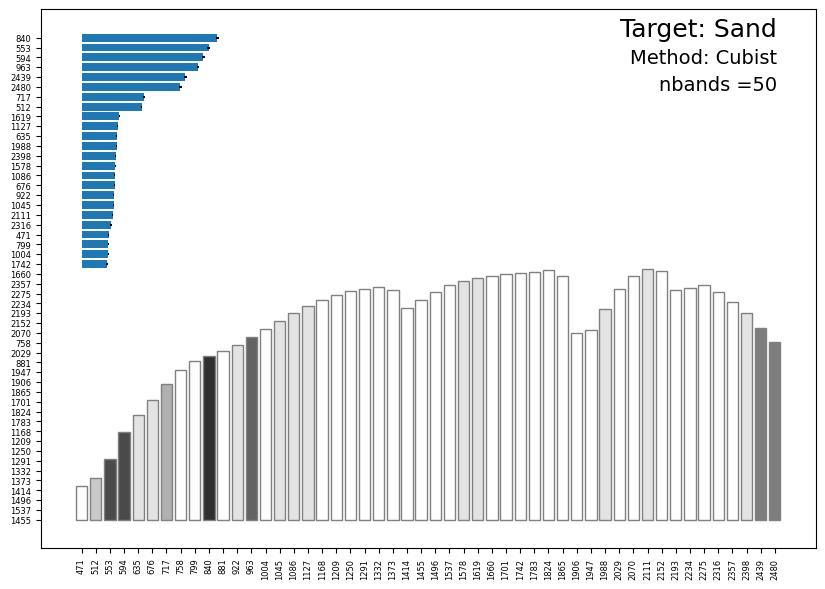

In [154]:
show_important_features_for ('Sand', model_details, feature_scores, 10, 50, 1)

###  Silt 

Silt -> [ iqrp - **1.91**, r2 - **0.43**, Spec - fod, n_bands - 8, Tar - none] :   **mult**  <br/><br/>
***Description***: We get the best model for silt when we use mult (multiple linear regression) method. \
While training the model we utilize the first order derivative of the smoothed spectra which is resampled to 8 bands and
silt values are used without any preprocessing.

In [112]:
silt_model_mult = linear_model.LinearRegression()
silt_model_mult.fit(sampled_fod[8], T[1])

LinearRegression()

In [113]:
sampled_fod[8].head(1)

,579,835,1091,1347,1604,1860,2116,2372
0,0.000736,0.000372,0.000309,-0.000015,0.000167,-0.000264,0.000163,-0.00046


In [115]:
feature_scores['Silt'] = permutation_importance(silt_model_mult, sampled_fod[8], T[1], n_repeats=20, random_state=0)

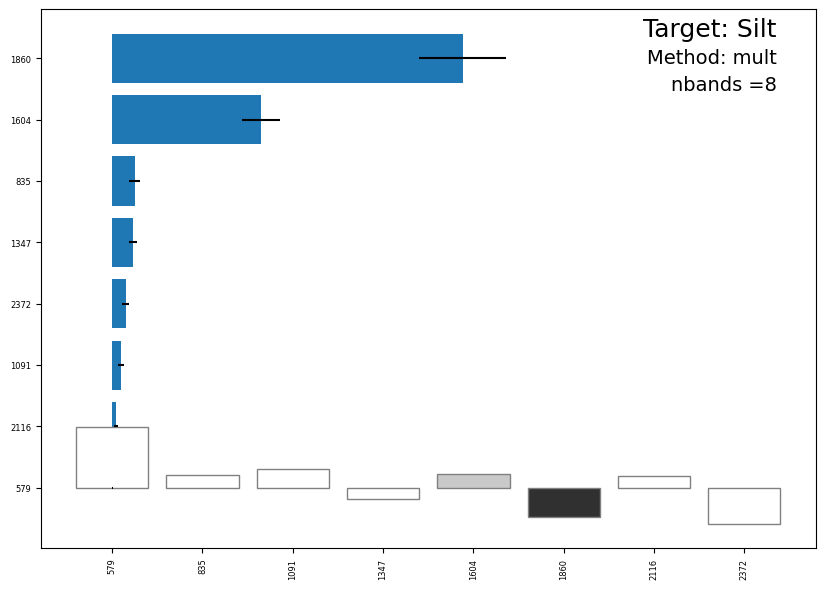

In [155]:
model_details['Silt'] = {'method': 'mult', 'spec': sampled_fod[8], 'spec_proc': 'fod', 'n_bands': 8}

show_important_features_for ('Silt', model_details, feature_scores, 1, 1000, 5)

##  Clay

Clay -> [ iqrp - **2.99**, r2 - **0.77**, Spec - log, n_bands - 15, Tar - minmax] :   **mult**   <br/><br/>
***Description***: We get the best model for clay when we use mult (multiple linear regression) method. \
While training the model we utilize the inverse logarithmic reflectance (1/logR) of the smoothed spectra which is resampled to 15 bands and clay values are used by  normalizing it in the range of 0-10.

In [156]:
clay_model_mult = linear_model.LinearRegression()
clay_model_mult.fit(sampled_log[15], NT[2])

LinearRegression()

In [157]:
sampled_log[15].head(1)

,519,656,792,929,1066,1202,1339,1476,1612,1749,1886,2022,2159,2295,2432
0,2.420115,1.556326,1.225854,1.09747,0.961566,0.867871,0.841234,0.869084,0.792377,0.767627,0.909422,0.866668,0.796801,0.847628,1.014666


In [158]:
feature_scores['Clay'] = permutation_importance(clay_model_mult, sampled_log[15], NT[2], n_repeats=20, random_state=0)

model_details['Clay'] = {'method': 'mult', 'spec': sampled_log[15], 'spec_proc': 'log', 'n_bands': 15}

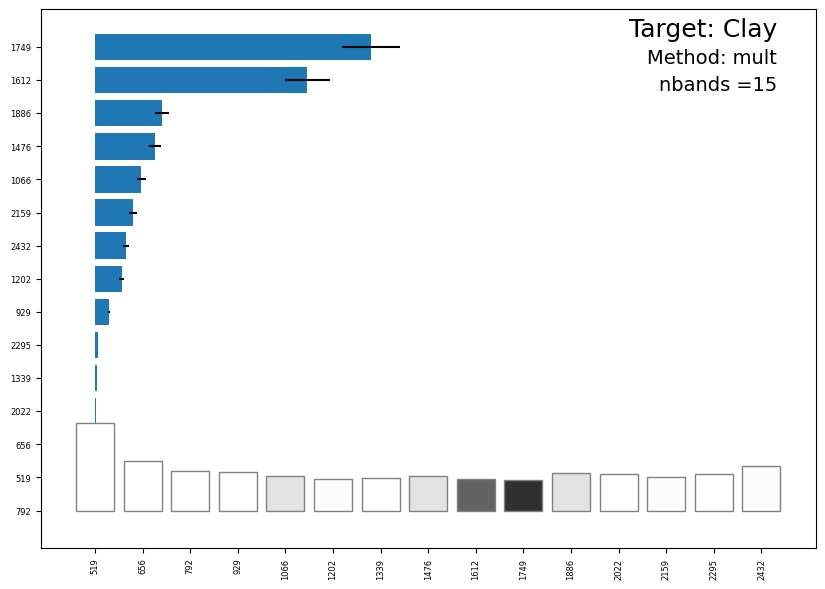

In [191]:
show_important_features_for ('Clay', model_details, feature_scores, 0.001, 1, 2)

##  TOC 

TOC -> [ iqrp - **2.22**, r2 - **0.76**, Spec - continuum, n_bands - 55, Tar - minmax] :   **gbrt**  <br/><br/>
***Description***: We get the best model for TOC when we use gbrt (gradient boosted regression tree) method. \
While training the model we utilize the continuum removed version of the smoothed spectra which is resampled to 55 bands and
TOC values are used by  normalizing it in the range of 0-10.

In [193]:
TOC_model_gbrt = GradientBoostingRegressor() 
TOC_model_gbrt.fit(sampled_cr[55], NT[3])

GradientBoostingRegressor()

In [194]:
sampled_cr[55].head(1)

,469,506,544,581,618,656,693,730,767,805,842,879,916,954,991,1028,1066,1103,1140,1177,1215,1252,1289,1326,1364,1401,1438,1476,1513,1550,1587,1625,1662,1699,1736,1774,1811,1848,1886,1923,1960,1997,2035,2072,2109,2146,2184,2221,2258,2296,2333,2370,2407,2445,2482
0,0.008825,0.025007,0.027884,0.009624,0.00061,0.002165,0.00156,0.000405,0.000406,0.00075,0.003497,0.006763,0.00789,0.007139,0.005405,0.003143,0.001337,0.000544,0.000473,0.000461,0.000408,0.000406,0.000449,0.000631,0.004752,0.035943,0.039189,0.026865,0.015806,0.008635,0.005048,0.00303,0.001526,0.000624,0.002,0.002036,0.001459,0.001745,0.05774,0.136774,0.103642,0.067122,0.03583,0.017892,0.005733,0.003792,0.02346,0.024483,0.004395,0.001013,0.000679,0.001348,0.000833,0.004565,0.003966


In [195]:
feature_scores['TOC'] = permutation_importance(TOC_model_gbrt, sampled_cr[55], NT[3], n_repeats=20, random_state=0)

model_details['TOC'] = {'method': 'gbrt', 'spec': sampled_cr[55], 'spec_proc': 'cr', 'n_bands': 55}

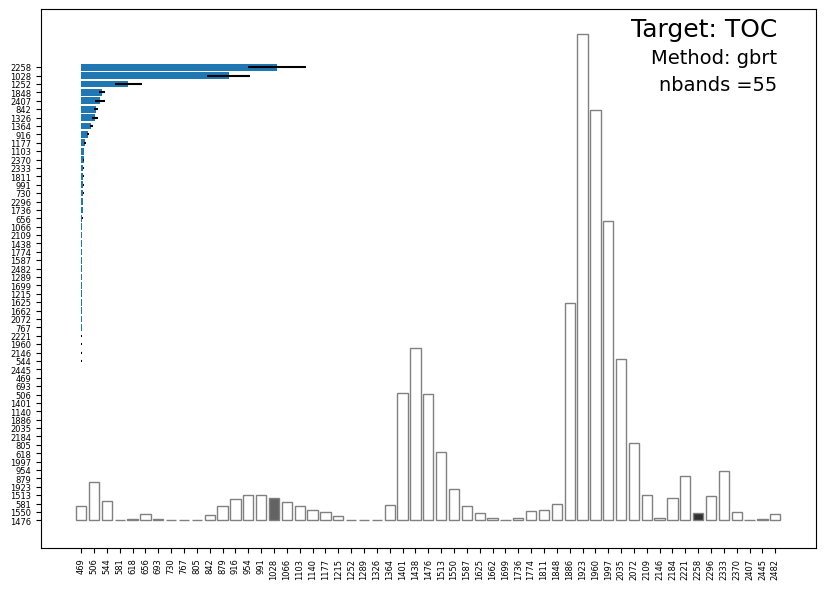

In [205]:
show_important_features_for ('TOC', model_details, feature_scores, 50, 250, 55)

##  CaCO3 

CaCO3 -> [ iqrp - **2.35**, r2 - **0.61**, Spec - none, n_bands - 3, Tar - none] :   **gbrt**  <br/><br/>
***Description***: We get the best model for CaCO3 when we use gbrt (gradient boosted regression tree ) method. \
While training the model we utilize the smoothed spectra which is resampled to 3 bands and
CaCO3 values are used without any preprocessing.

In [206]:
CaCO3_model_gbrt = GradientBoostingRegressor()
CaCO3_model_gbrt.fit(sampled_spec[3], T[4])

GradientBoostingRegressor()

In [207]:
sampled_spec[3].head(1)

,792,1476,2159
0,0.263038,0.437562,0.414411


In [210]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_gbrt, sampled_spec[3], T[4], n_repeats=20, random_state=0)

model_details['CaCO3'] = {'method': 'gbrt', 'spec': sampled_spec[3], 'spec_proc': 'spectra', 'n_bands': 3}

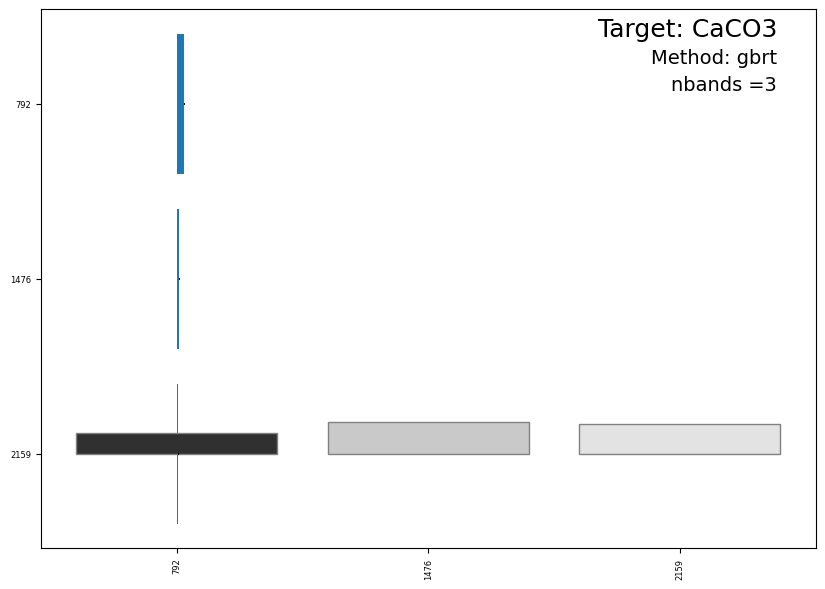

In [222]:
show_important_features_for ('CaCO3', model_details, feature_scores, 0.02, 0.5, 3)

In [204]:
ipywidgets.interact(show_important_features_for, tar = target_names, model_details = [model_details], 
                    feature_scores = [feature_scores], r_factor = (0,100,0.01), X_factor = (0,1000,1), sample = (0,50,1))
                    
                                       
#                     model_details= model_details, \
#                     feature_scores = feature_scores, r_factor = 1, X_factor= 1000, sample = (0,50,1))

interactive(children=(Dropdown(description='tar', options=('Sand', 'Silt', 'Clay', 'TOC', 'CaCO3'), value='San…

<function __main__.show_important_features_for(tar, model_details, feature_scores, r_factor, X_factor, sample)>